# (1) Data Description:
The dataset has 2 files, `players.csv` and `sessions.csv`. This data was collected by a UBC Computer Science research group led by Frank Wood. They set up a Minecraft server to record player's activity throughout the game.

**Player Dataset**: `players.csv`, contains data on each unique player.<br>
Observations: 196, Variables: 7

| Variable|Description|Type|Mean (summary statistic)|
|:--------|:---|:-------|:-----|
|`experience`|experience of a player; Beginner, Amateur, Regular, Pro, Veteran|chr (character)|N/A|
|`subscribe`|if the player is subscribed to the game related newsletter|chr (character)| N/A|
|`hashedEmail`|ID of player|chr (character)| N/A|
|`played_hours`|number of hours played|dbl (numeric value with decimals)|5.845918	
|`name`|name of the player|chr (character)|N/A|
|`gender`|gender of player|chr (character)|N/A|
|`age`|age of the player|dbl (numeric value with decimals)|21.13918

**Session Dataset**: `sessions.csv`, contains data on each session played by a player.

Observations: 1535, Variables: 5
| Variable|Description|Type|
|:--------|:---|:-------|
|`hashedEmail`|ID of player|chr (character)|
|`start_time`|time the session started|chr (character)|
|`end_time`|time the session ended|chr (character)|
|`original_start_time`|time the session started in UNIX time units (milliseconds)|dbl (numeric value with decimals)|
|`original_end_time`|time the session ended in UNIX time units (milliseconds)|dbl (numeric value with decimals)|

# (2) Questions:
Can age and experience predict total number of hours played for a player?

Looking at the relationship between experience, player_hours and age to determine if played_hours can be predicted by experience and age. I should convert experience to a factor variable type as it is a categorical variable, and also filter our any rows with N/A values. Because we are trying to predict a numerical value (played_hours), I will use the player.csv dataset in a KNN regression model.

# (3) Exploratory Data and Visual Analysis:

In [3]:
library(tidyverse)
library(tidymodels)

In [4]:
# reading/loading the data
player_url <- "https://raw.githubusercontent.com/awong83/dsci100-individual-project/refs/heads/main/players.csv"
session_url <- "https://raw.githubusercontent.com/awong83/dsci100-individual-project/refs/heads/main/sessions.csv"

player_data <- read_csv(player_url)
player_data

session_data <- read_csv(session_url)
session_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [5]:
# wrangling data into a tidy format
# both players.csv and sessions.csv are in tidy format

# compute the mean value for each quantitative variable (Age, played_hours)
mean_values <- player_data |>
    select(played_hours, Age)|>
    map_df(mean, na.rm = TRUE)
mean_values

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


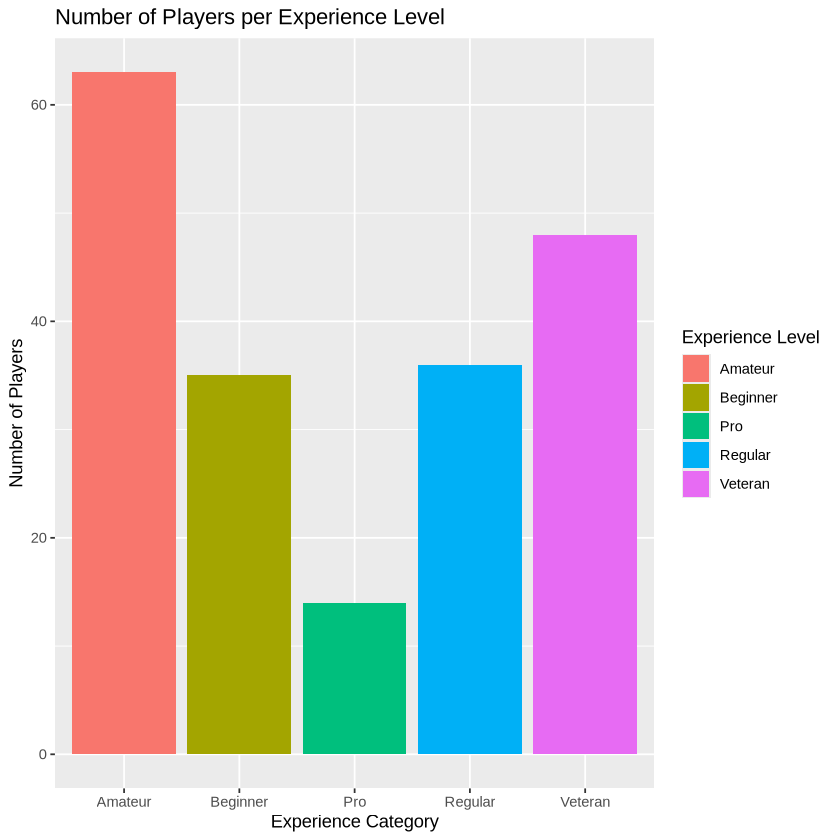

In [6]:
#exploratory visualizations

#1) bar plot by experience

experience_plot <- player_data |>
    ggplot(aes(x = experience, fill = experience))+
    geom_bar(stat = "count")+
    labs(x = "Experience Category",
         y = "Number of Players",
         fill = "Experience Level",
         title = "Number of Players per Experience Level")
experience_plot

Most common experience level is amateur, whereas least common is pro experience players. Beginner, regular and veteran are less extreme. The significant difference betweeen amateur and pro players may lead to imbalances in predictions for KNN regression.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


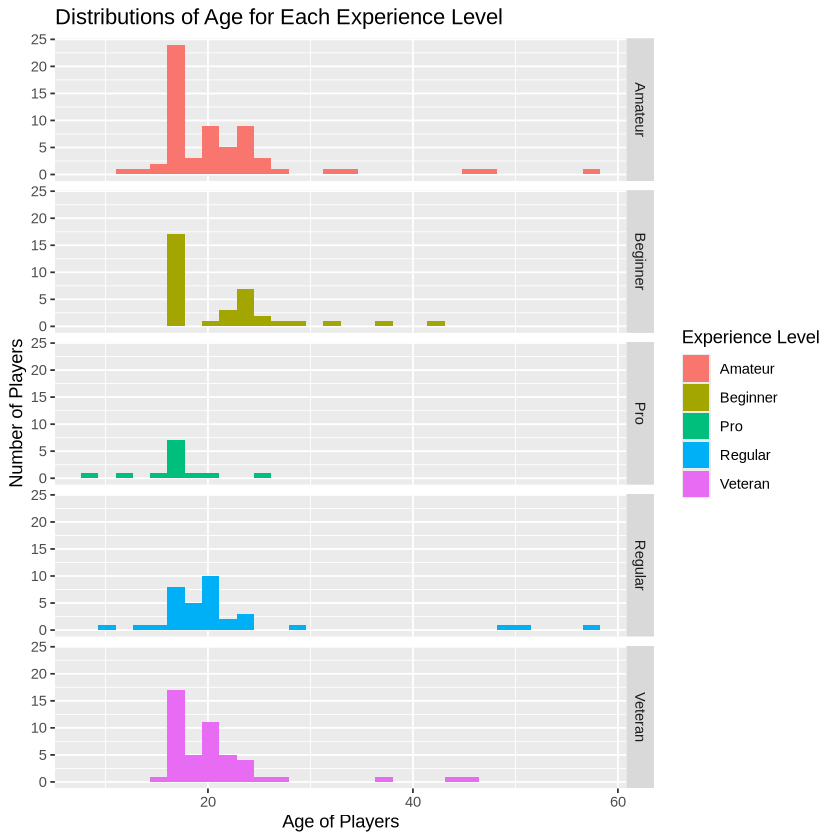

In [7]:
#2) distribution plot of age by experience

experience_age_grouped <- player_data |>
    group_by(Age)

experience_hours_grouped <- player_data |>
    group_by(played_hours)

age_experience <- experience_age_grouped |>
    ggplot(aes(x = Age, fill = experience)) +
    geom_histogram() +
    facet_grid(rows = vars(experience)) +
    labs(x = "Age of Players",
         y = "Number of Players",
         fill = "Experience Level",
         title = "Distributions of Age for Each Experience Level")
age_experience

Majority of players range from 15 to 25 years old. Pro players show the smallest range with the lowest ages of below 10 to highest around high 20s. All other experience levels have players with ages above 40.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_bar()`).”


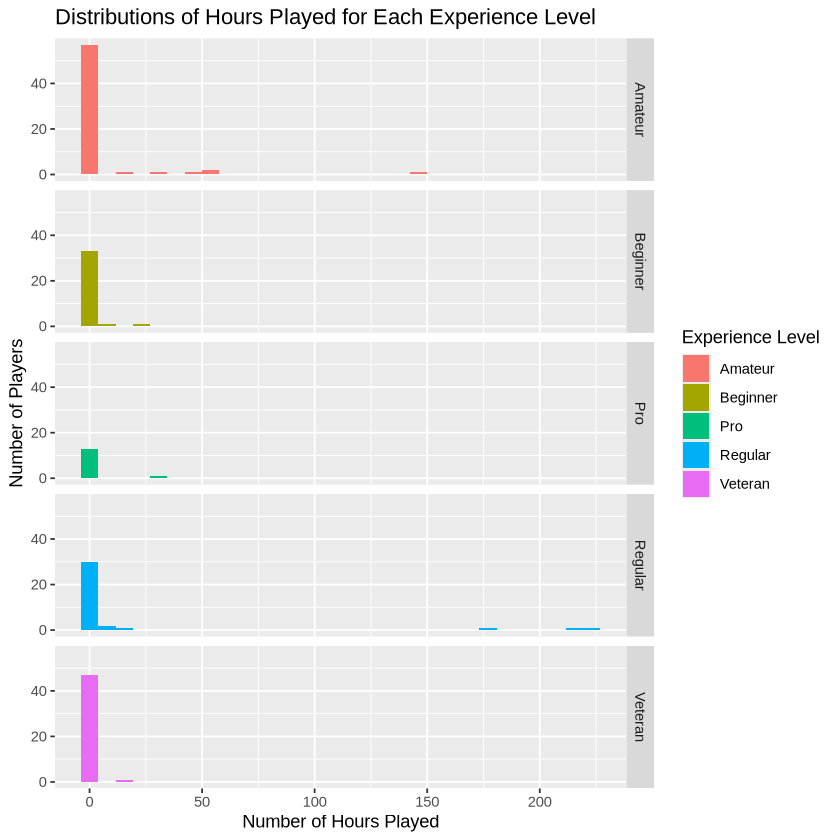

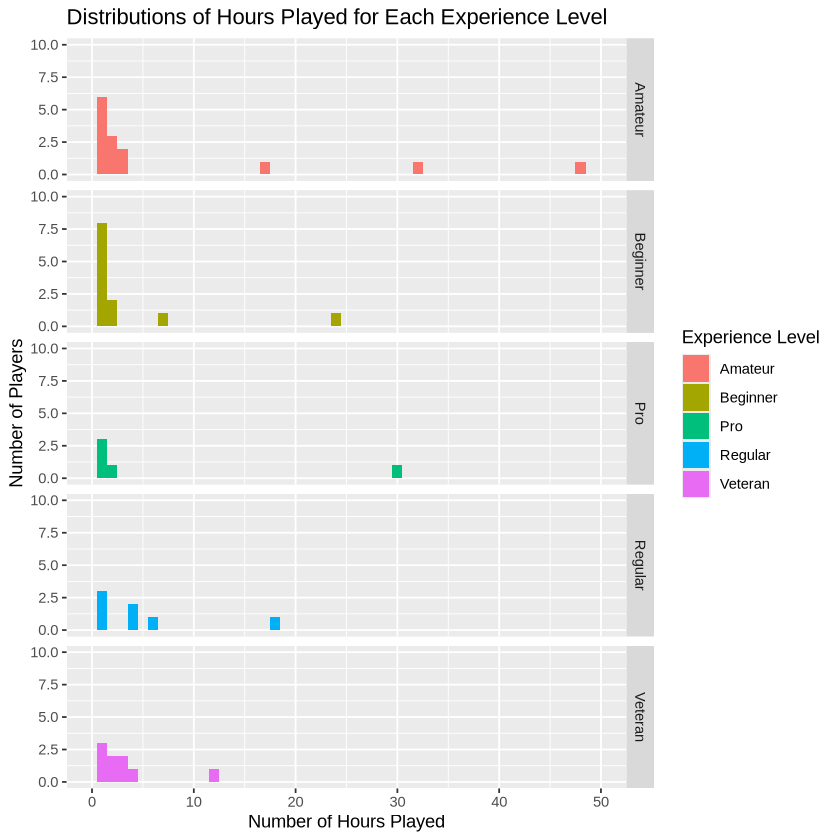

In [8]:
#3) distribution plot of played hours by experience

hours_experience <- experience_hours_grouped |>
    ggplot(aes(x = played_hours, fill = experience)) +
    geom_histogram() +
    facet_grid(rows = vars(experience)) +
    labs(x = "Number of Hours Played",
         y = "Number of Players",
         fill = "Experience Level",
         title = "Distributions of Hours Played for Each Experience Level")
hours_experience

# plot focusing on lower values/range of the graph

hours_experience_zoom <- experience_hours_grouped |>
    ggplot(aes(x = played_hours, fill = experience)) +
    geom_histogram(binwidth = 1) +
    facet_grid(rows = vars(experience)) +
    labs(x = "Number of Hours Played",
         y = "Number of Players",
         fill = "Experience Level",
         title = "Distributions of Hours Played for Each Experience Level") +
    xlim(0, 50) +
    ylim(0, 10)
hours_experience_zoom

Most players have less than 50 hours played, with many having zero or close to zero number of hours played.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_point()`).”


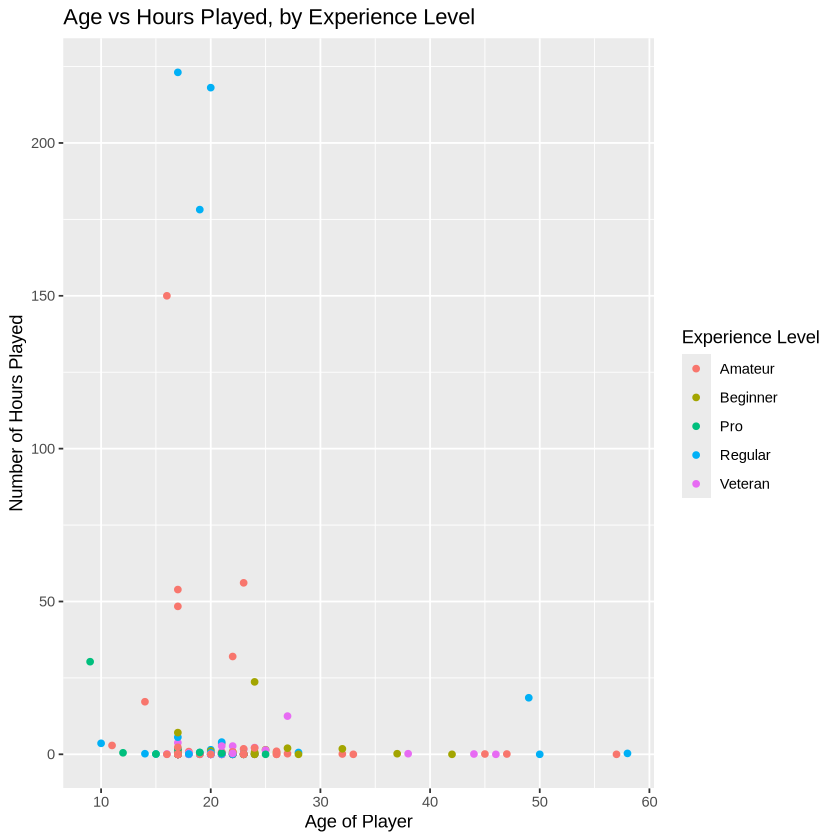

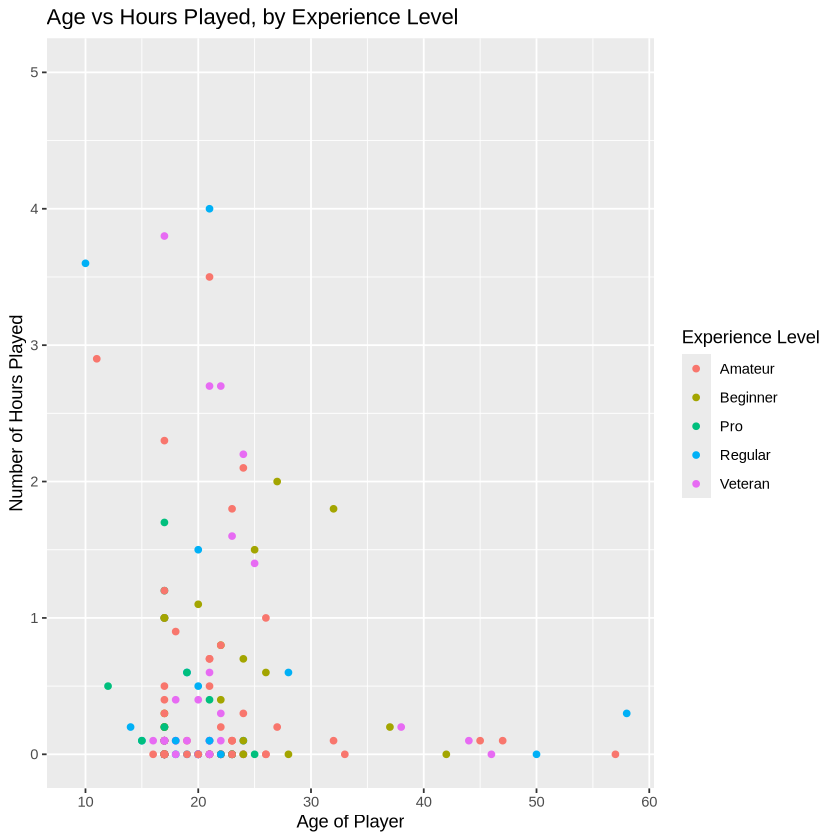

In [9]:
#3) scatterplot of age by played_hours by coloured by experience

age_hours_scatter <- player_data |>
    ggplot(aes(x = Age, y = played_hours, colour = experience)) +
    geom_point() +
    labs(x = "Age of Player",
         y = "Number of Hours Played",
         colour = "Experience Level",
         title = "Age vs Hours Played, by Experience Level")
age_hours_scatter

#focusing on the lower values (where more point are clustered)
age_hours_scatter_zoom <- player_data |>
    ggplot(aes(x = Age, y = played_hours, colour = experience)) +
    geom_point() +
    labs(x = "Age of Player",
         y = "Number of Hours Played",
         colour = "Experience Level",
         title = "Age vs Hours Played, by Experience Level")+
    ylim(0,5)
age_hours_scatter_zoom

We see a very spread out distribution, suggesting no linear relationship. Many players are clustered around 0-1 hour of play time.

# (4) Methods and Plan:

I will use the KNN regression model with the player.csv dataset to answer my question. Because I am interested in predicting number of hours played, a numerical value, based on age and experience, but as it may show a non-linear relationship, KNN regression model (not linear regression) seems like the best option.

Potential limitations may include imbalances of specific variables, like experience for example may show an extremely high amount of amateur players and an extremely low amount of pro players which may lead to misclassifications due to a prediction only considering amateur players. (as KNN regression choose the majority of its nearby values/points)

I will split the data into 75% training and 25% testing data sets. I will use the training set to determine the performance of the classifier and to find to K with the highest accuracy to prevent under and overfitting. To do this, I will create a receipte for preprocessing the data (like standardization) and then create a model specfiication for KNN regression. Then I will run a 5-fold cross validation and determine the best K value for my classifier. After finding the optimal K value, I will then rerun the classifier with my testing set and observe the performance on new/unseen data.